In [62]:
import warnings
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", RuntimeWarning)

from collections import Counter
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def outliers(df, n, cols):

  out_idx = []

  for col in cols:

    q1 = np.percentile(df[col], 25)

    q3 = np.percentile(df[col], 75)

    iqr = q3 - q1

    step = 1.5 * iqr

    lower_bound = q1 - step
    upper_bound = q3 + step

    out_list = df[(df[col] < lower_bound) & (df[col] > upper_bound)].index

    print(col, lower_bound, upper_bound)

    out_idx.extend(out_list)

  out_idx = Counter(out_idx)
  outliers = list((k for k, v in out_idx.items() if v > n))

  return outliers

In [64]:
def mct(df, col):
  median = df[col].median()
  mean = df[col].mean()
  mode = df[col].mode()
  
  return mean, median, mode

def services_preprocessing(df, col):
  plt.figure(figsize=(15, 12))
  sns.kdeplot(
    x = np.log(df[col]),
    data = df,
    # kde = True,
  )

  mean, median, mode = mct(df, "foodcourt")

  print(f"{col} Mean - {mean}")
  print(f"{col} Median - {median}")
  print(f"{col} Mode - {mode}")

  plt.figure(figsize=(15, 12))
  sns.kdeplot(
    x = np.log(df[col]),
    data = df,
    label = 'Pre-Imputation'
  )
  sns.kdeplot(
    x = np.log(df[col].fillna(mean)),
    data = df,
    label = "Mean - Imputation"
  )
  sns.kdeplot(
    x = np.log(df[col].fillna(median)),
    data = df,
    label = "Median - Imputation"
  )
  plt.legend()

  df[col].fillna(median, inplace=True)

  return df

In [3]:
train = pd.read_csv("./spaceship-titanic/train.csv")
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## EDA

In [4]:
df = train.copy()

In [5]:
df.columns = df.columns.str.lower()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passengerid   8693 non-null   object 
 1   homeplanet    8492 non-null   object 
 2   cryosleep     8476 non-null   object 
 3   cabin         8494 non-null   object 
 4   destination   8511 non-null   object 
 5   age           8514 non-null   float64
 6   vip           8490 non-null   object 
 7   roomservice   8512 non-null   float64
 8   foodcourt     8510 non-null   float64
 9   shoppingmall  8485 non-null   float64
 10  spa           8510 non-null   float64
 11  vrdeck        8505 non-null   float64
 12  name          8493 non-null   object 
 13  transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
df.isnull().sum()

passengerid       0
homeplanet      201
cryosleep       217
cabin           199
destination     182
age             179
vip             203
roomservice     181
foodcourt       183
shoppingmall    208
spa             183
vrdeck          188
name            200
transported       0
dtype: int64

In [8]:
for col in df.columns:
  print(f"{col} - {df[col].nunique()}")

passengerid - 8693
homeplanet - 3
cryosleep - 2
cabin - 6560
destination - 3
age - 80
vip - 2
roomservice - 1273
foodcourt - 1507
shoppingmall - 1115
spa - 1327
vrdeck - 1306
name - 8473
transported - 2


In [9]:
for col in df.select_dtypes(include=['object']).columns:
  if df[col].nunique() <= 5:
    print(f"{col}", end=":\n")
    print(f"{df[col].value_counts()}")
    print("\n")

homeplanet:
Earth     4602
Europa    2131
Mars      1759
Name: homeplanet, dtype: int64


cryosleep:
False    5439
True     3037
Name: cryosleep, dtype: int64


destination:
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: destination, dtype: int64


vip:
False    8291
True      199
Name: vip, dtype: int64




In [10]:
df.describe()

,age,roomservice,foodcourt,shoppingmall,spa,vrdeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


### **Missing Values**

In [12]:
df.select_dtypes(include=np.number).isnull().sum()

age             179
roomservice     181
foodcourt       183
shoppingmall    208
spa             183
vrdeck          188
dtype: int64

#### **Age**

In [15]:
df.corr()['age'].sort_values(ascending=False)

age             1.000000
foodcourt       0.130421
spa             0.123970
vrdeck          0.101007
roomservice     0.068723
shoppingmall    0.033133
transported    -0.075026
Name: age, dtype: float64

<AxesSubplot:xlabel='age', ylabel='Count'>

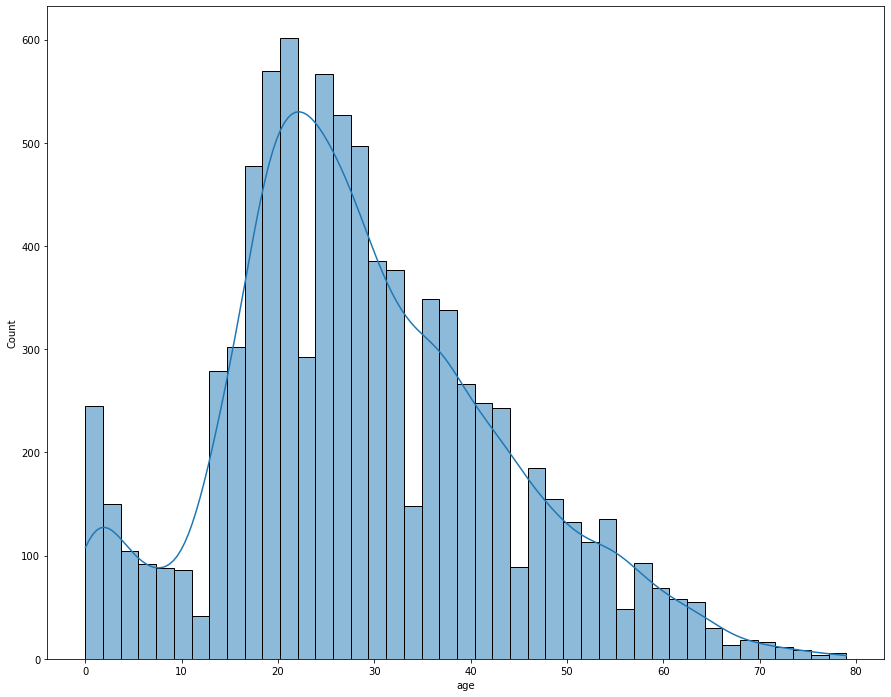

In [19]:
plt.figure(figsize=(15, 12))
sns.histplot(
  x = 'age',
  data = df,
  kde = True,
)

In [43]:
mean, median, mode = mct(df, 'age')

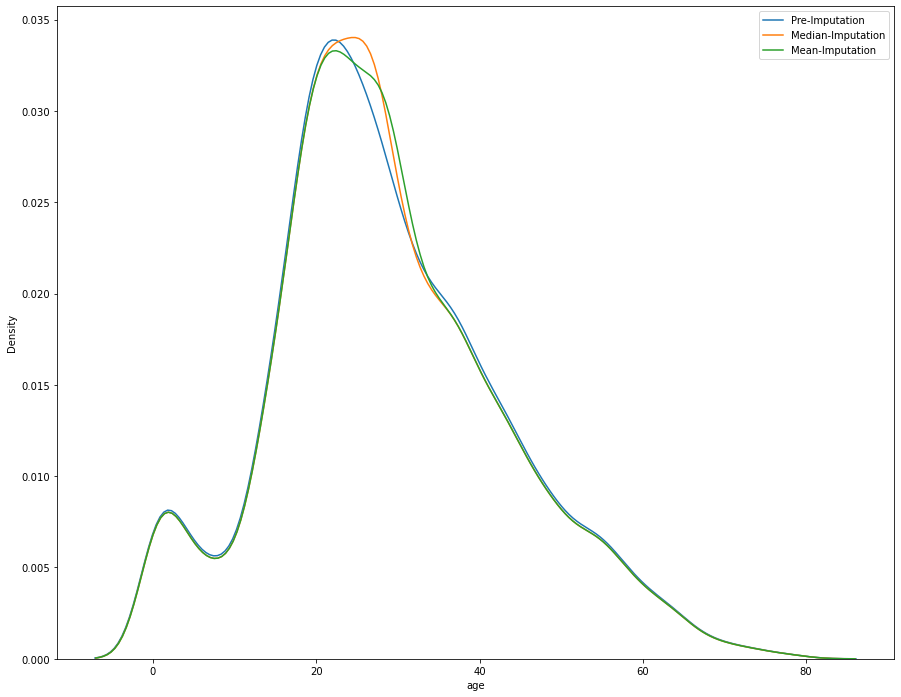

In [32]:
plt.figure(figsize=(15, 12))
sns.kdeplot(
  x = 'age',
  data = df,
  label = "Pre-Imputation"
)

sns.kdeplot(
  x = df['age'].fillna(median),
  data = df,
  label = "Median-Imputation"
)
plt.legend()
sns.kdeplot(
  x = df['age'].fillna(mean),
  data = df,
  label = "Mean-Imputation"
)
plt.legend()

In [33]:
df['age'].fillna(median, inplace=True)

In [36]:
df.select_dtypes(include=np.number).isnull().sum()

age               0
roomservice     181
foodcourt       183
shoppingmall    208
spa             183
vrdeck          188
dtype: int64

#### **Room Service**

<AxesSubplot:xlabel='roomservice', ylabel='Density'>

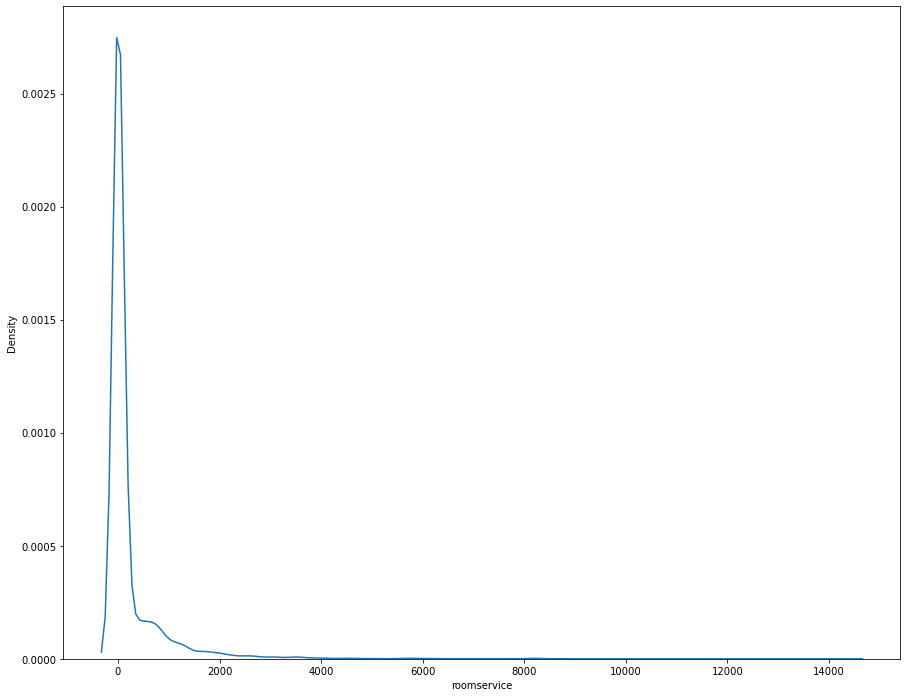

In [40]:
plt.figure(figsize=(15, 12))
sns.kdeplot(
  x = 'roomservice',
  data = df,
  # kde = True,
)

In [39]:
df.roomservice.isnull().sum()

181

In [45]:
mean, median, mode = mct(df, "roomservice")

In [46]:
mean, median, mode

(224.687617481203,
 0.0,
 0    0.0
 Name: roomservice, dtype: float64)

/home/xviix/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/xviix/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/xviix/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


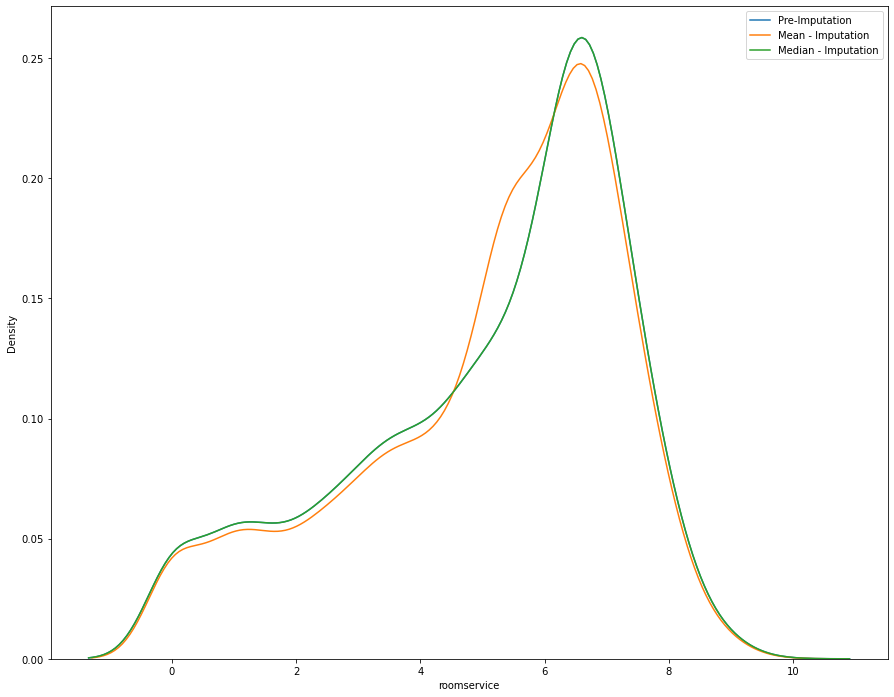

In [51]:
plt.figure(figsize=(15, 12))
sns.kdeplot(
  x = np.log(df['roomservice']),
  data = df,
  label = 'Pre-Imputation'
)
sns.kdeplot(
  x = np.log(df['roomservice'].fillna(mean)),
  data = df,
  label = "Mean - Imputation"
)
sns.kdeplot(
  x = np.log(df['roomservice'].fillna(median)),
  data = df,
  label = "Median - Imputation"
)
plt.legend()

In [52]:
df.roomservice.fillna(median, inplace=True)

#### **Food Court**

/home/xviix/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='foodcourt', ylabel='Density'>

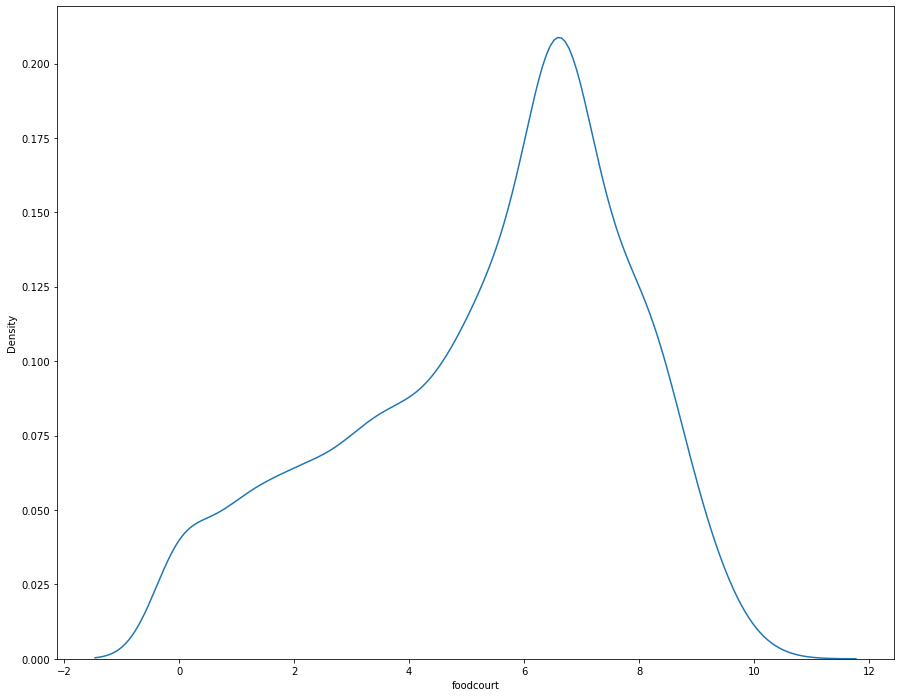

In [54]:
plt.figure(figsize=(15, 12))
sns.kdeplot(
  x = np.log(df['foodcourt']),
  data = df,
  # kde = True,
)

In [55]:
mean, median, mode = mct(df, "foodcourt")

In [56]:
mean, median, mode

(458.07720329024676,
 0.0,
 0    0.0
 Name: foodcourt, dtype: float64)

/home/xviix/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/xviix/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/xviix/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


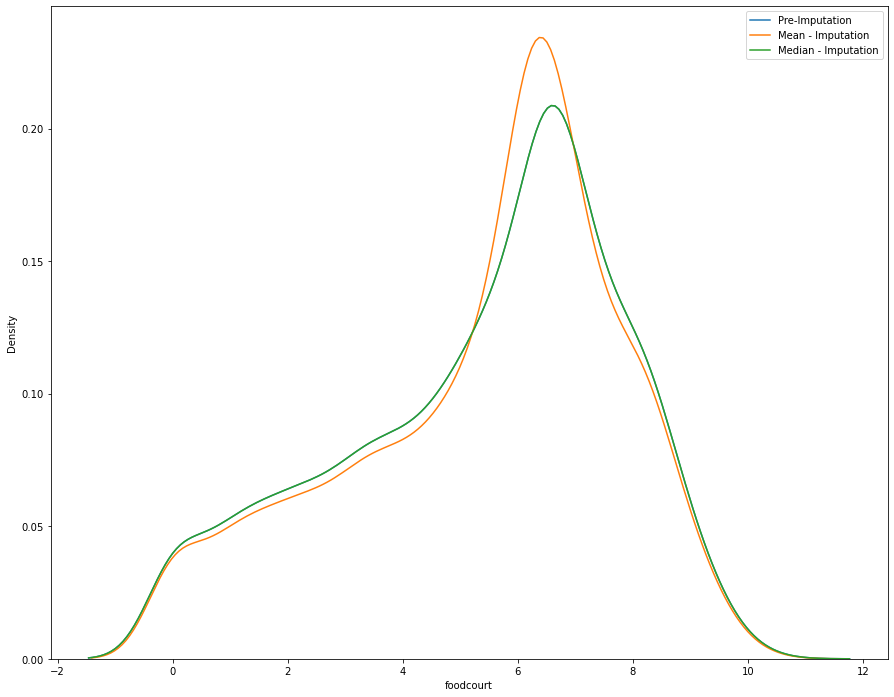

In [57]:
plt.figure(figsize=(15, 12))
sns.kdeplot(
  x = np.log(df['foodcourt']),
  data = df,
  label = 'Pre-Imputation'
)
sns.kdeplot(
  x = np.log(df['foodcourt'].fillna(mean)),
  data = df,
  label = "Mean - Imputation"
)
sns.kdeplot(
  x = np.log(df['foodcourt'].fillna(median)),
  data = df,
  label = "Median - Imputation"
)
plt.legend()

In [58]:
df.roomservice.fillna(median, inplace=True)

#### Shopping Mall

shoppingmall Mean - 448.4340273783504
shoppingmall Median - 0.0
shoppingmall Mode - 0    0.0
Name: foodcourt, dtype: float64


,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


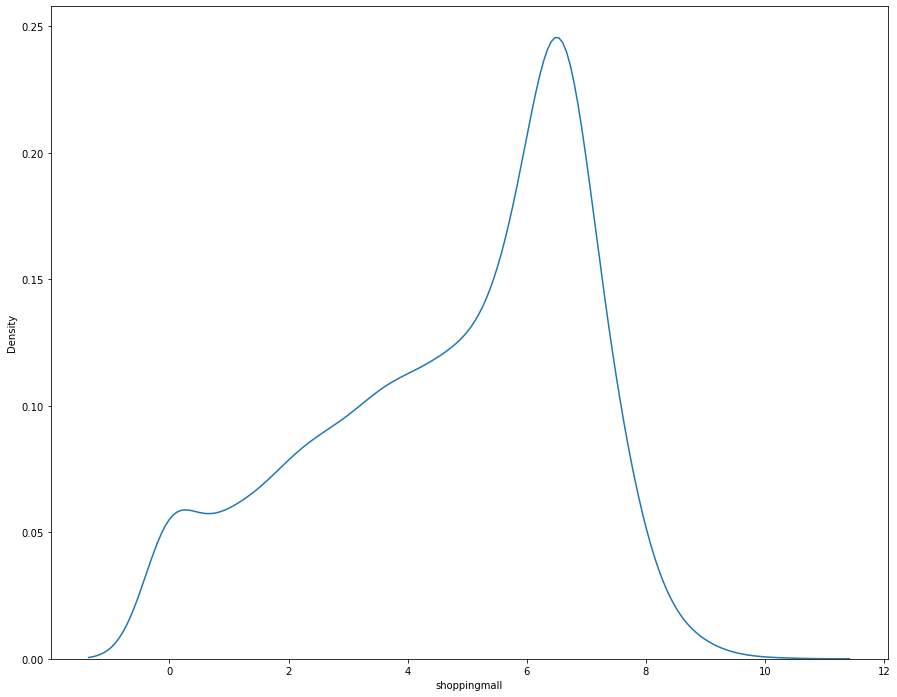

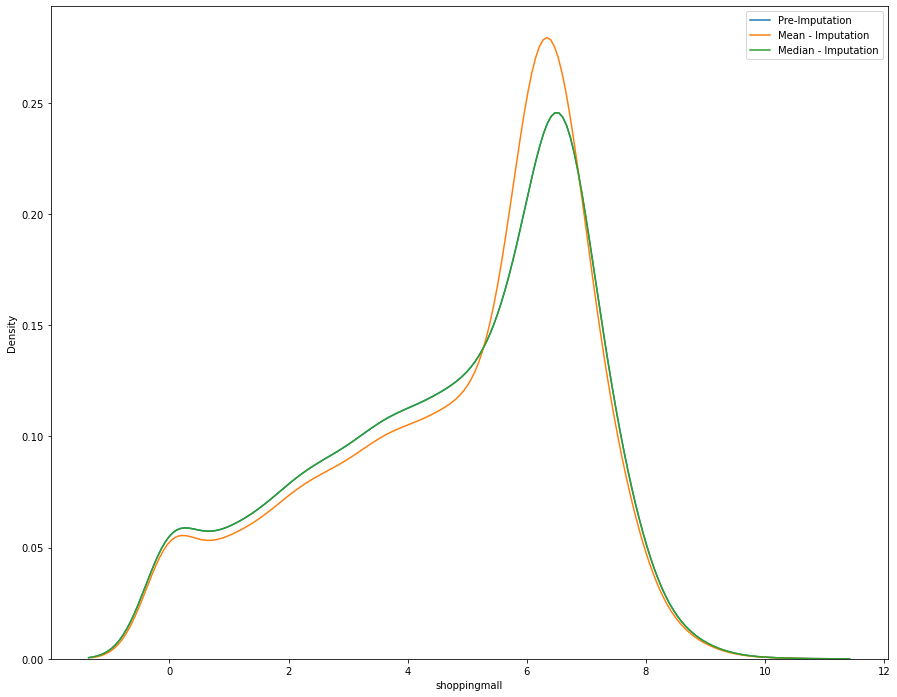

In [65]:
services_preprocessing(df, "shoppingmall")

#### **Spa and VR-Deck**

spa Mean - 448.4340273783504
spa Median - 0.0
spa Mode - 0    0.0
Name: foodcourt, dtype: float64


,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


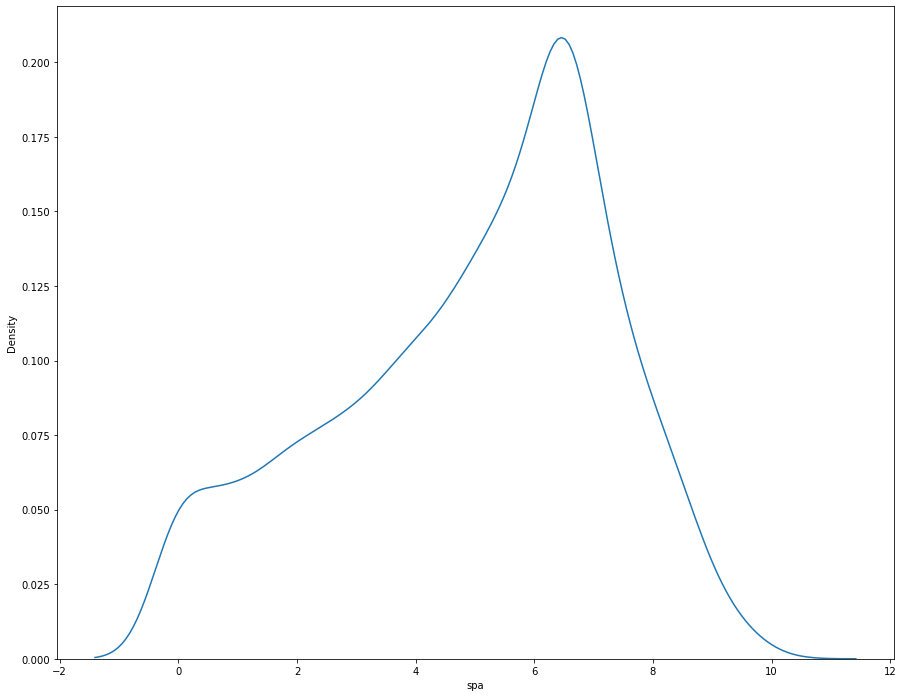

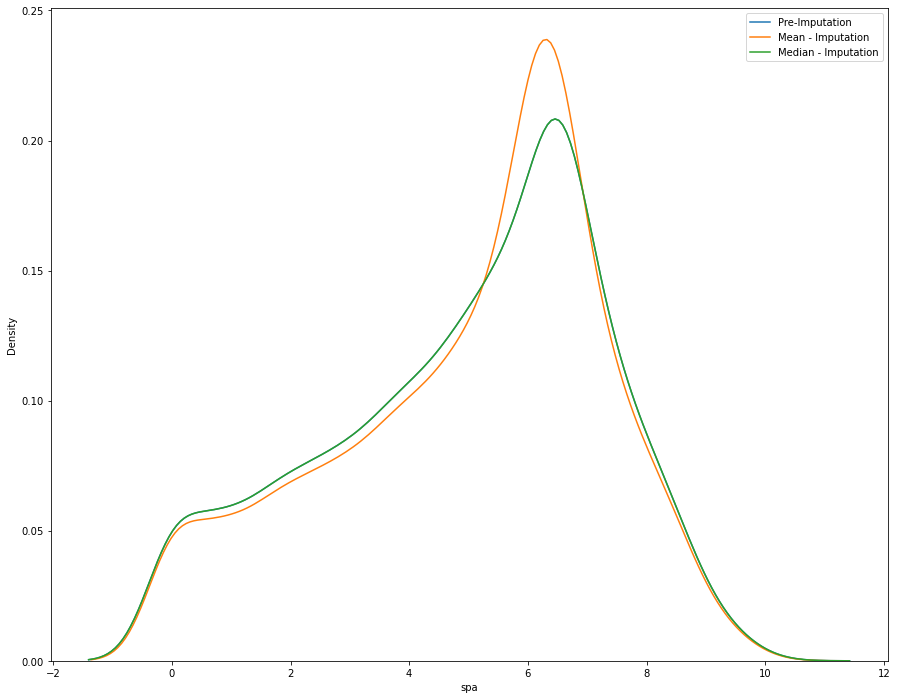

In [67]:
services_preprocessing(df, "spa")

vrdeck Mean - 448.4340273783504
vrdeck Median - 0.0
vrdeck Mode - 0    0.0
Name: foodcourt, dtype: float64


,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


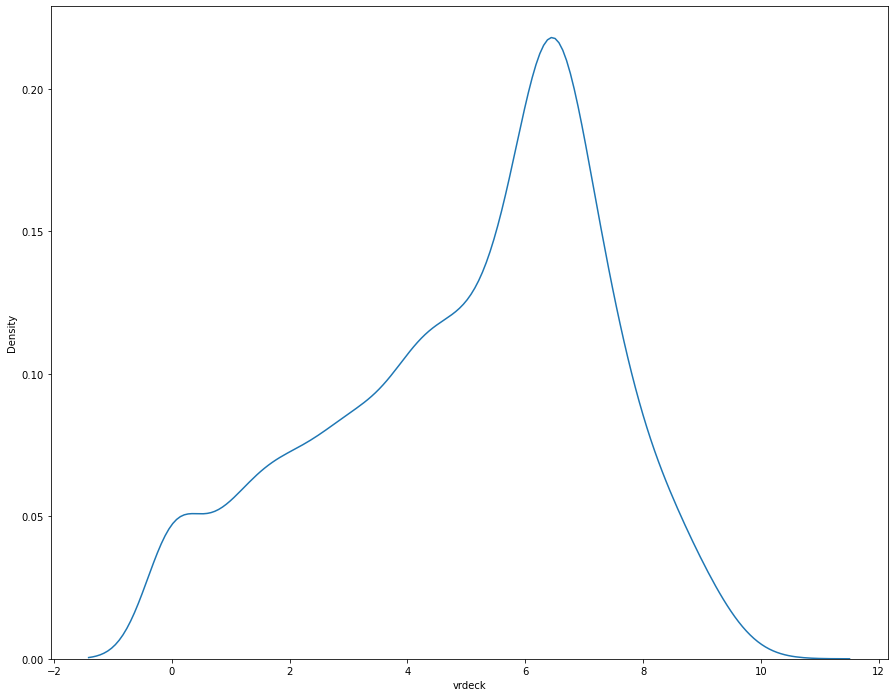

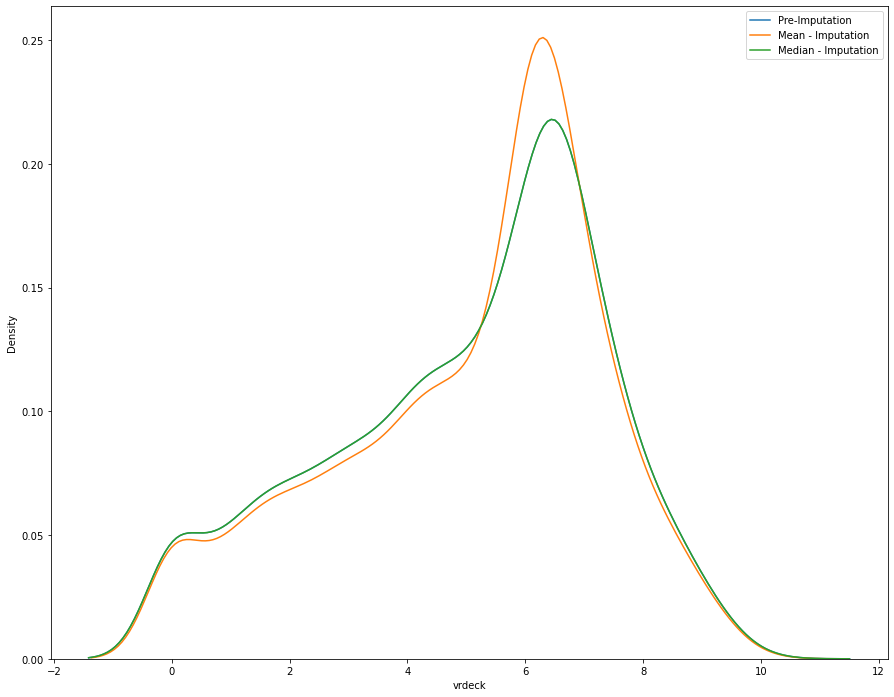

In [68]:
services_preprocessing(df, "vrdeck")

#### **Home Planet**

In [69]:
df.isnull().sum()

passengerid       0
homeplanet      201
cryosleep       217
cabin           199
destination     182
age               0
vip             203
roomservice       0
foodcourt         0
shoppingmall      0
spa               0
vrdeck            0
name            200
transported       0
dtype: int64

In [100]:
df['homeplanet'].fillna(df["homeplanet"].mode(), inplace=True)

#### **Destination**

In [101]:
df['destination'].fillna(df["destination"].mode(), inplace=True)

#### **Name**

Since names are unique

In [122]:
copy_df = df.copy()

In [123]:
copy_df.dropna(axis=0, inplace=True)

In [124]:
copy_df.reset_index(inplace=True)

**Feature Engineering**

In [125]:
df['name']

0         Maham Ofracculy
1            Juanna Vines
2           Altark Susent
3            Solam Susent
4       Willy Santantines
              ...        
8688    Gravior Noxnuther
8689      Kurta Mondalley
8690         Fayey Connon
8691     Celeon Hontichre
8692     Propsh Hontichre
Name: name, Length: 8693, dtype: object

In [126]:
first = []
last = []

for i in range(len(copy_df)):
  first.append(copy_df['name'].str.split(" ")[i][0])
  last.append(copy_df['name'].str.split(" ")[i][1])

In [127]:
copy_df['firstname'], copy_df['lastname'] = first, last

In [128]:
copy_df

,index,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported,firstname,lastname
0,0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Maham,Ofracculy
1,1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Juanna,Vines
2,2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Altark,Susent
3,3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Solam,Susent
4,4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Willy,Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7554,8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,Gravior,Noxnuther
7555,8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,Kurta,Mondalley
7556,8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,Fayey,Connon
7557,8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,Celeon,Hontichre


In [129]:
copy_df['lastname'].value_counts()

Casonston      17
Oneiles        15
Litthews       14
Cartez         13
Briggston      13
               ..
Excionging      1
Robersondez     1
Brownson        1
Dingauge        1
Sionerorly      1
Name: lastname, Length: 2176, dtype: int64

**Dropping the column**

In [130]:
df = df.drop('name', axis=1)

df.head()

,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


#### **Passengerid**

In [131]:
df.isnull().sum()

passengerid       0
homeplanet      201
cryosleep       217
cabin           199
destination     182
age               0
vip             203
roomservice       0
foodcourt         0
shoppingmall      0
spa               0
vrdeck            0
transported       0
dtype: int64

In [132]:
copy_df

,index,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported,firstname,lastname
0,0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Maham,Ofracculy
1,1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Juanna,Vines
2,2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Altark,Susent
3,3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Solam,Susent
4,4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Willy,Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7554,8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,Gravior,Noxnuther
7555,8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,Kurta,Mondalley
7556,8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,Fayey,Connon
7557,8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,Celeon,Hontichre


In [133]:
group = []
for i in range(len(copy_df)):
  group.append(copy_df['passengerid'].str.split('_')[i][0])

copy_df['group'] = group